In [297]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dataprep.eda import create_report
import seaborn as sns
from sklearn.model_selection import train_test_split

In [298]:
df = pd.read_csv('./Fish.csv')
df

Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]

In [299]:
# report = create_report(df, title = 'Fish report')

  0%|          | 0/1271 [00:00<?, ?it/s]

/home/alt9193/.local/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


In [300]:
# report.show_browser()

In [301]:
df.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

Gtk-Message: 22:21:44.177: Failed to load module "xapp-gtk3-module"


Opening in existing browser session.


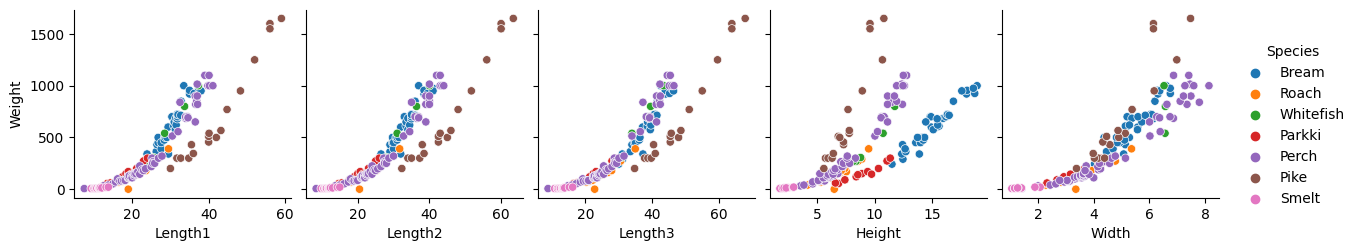

In [302]:

sns.pairplot(data= df,
             x_vars = ['Length1','Length2','Length3','Height','Width'],
             y_vars = 'Weight', 
             hue = 'Species')

In [303]:
df = df.drop(columns = ['Length2', 'Length3'])

In [304]:
df['Species'] = df['Species'].replace(['Perch','Bream','Roach','Pike','Smelt','Parkki','Whitefish'],[1,2,3,4,5,6,7])

In [305]:
df['Species']

0      2
1      2
2      2
3      2
4      2
      ..
154    5
155    5
156    5
157    5
158    5
Name: Species, Length: 159, dtype: int64

In [306]:
df.describe()

Species       Weight     Length1      Height       Width
count  159.000000   159.000000  159.000000  159.000000  159.000000
mean     2.716981   398.326415   26.247170    8.970994    4.417486
std      1.804117   357.978317    9.996441    4.286208    1.685804
min      1.000000     0.000000    7.500000    1.728400    1.047600
25%      1.000000   120.000000   19.050000    5.944800    3.385650
50%      2.000000   273.000000   25.200000    7.786000    4.248500
75%      4.000000   650.000000   32.700000   12.365900    5.584500
max      7.000000  1650.000000   59.000000   18.957000    8.142000

In [307]:
df.to_csv('clean_fish.csv')

In [308]:
#df.drop([142,143,144], axis=0, inplace=True)

In [309]:
y = df['Weight'].to_numpy()
y, testY = train_test_split(y, test_size=0.33)
m = len(y)

In [310]:
x = df.drop(columns=['Weight'])
x.columns


Index(['Species', 'Length1', 'Height', 'Width'], dtype='object')

In [311]:
x = np.c_[np.ones((len(x),1)), x]
x, testX = train_test_split(x, test_size=0.33)

In [312]:
teta = np.random.randn(5)

In [313]:
# Funcion para calcular el costo de una regresion lineal multivariable
# 1/2m * sumatoria((y_hat - y)**2)
def Costo(x, y, teta):
    y_hat = x.dot(teta)
    errores = np.subtract(y_hat, y)
    # J = costo de la regresion
    J = np.sum(np.square(errores)) / (2*m)
    return J

In [314]:
def GradienteDescediente(x, y, teta, alfa, epocas):
    historialCostos = np.zeros(epocas)
    
    for i in range(epocas):
        y_hat = x.dot(teta)
        error =np.subtract(y_hat, y)
        delta = (2/m) * x.transpose().dot(error)
        teta = teta - alfa * delta
        historialCostos[i] = Costo(x,y,teta)

    return teta, historialCostos


In [315]:
alfa = .00001
epocas = 100

In [316]:
teta, historialCostos = GradienteDescediente(x, y, teta, alfa, epocas)

In [317]:
teta

array([-0.40908082,  1.93448082,  9.56476778,  3.69960305,  1.85719556])

In [318]:
historialCostos[-1]

95040.81191977089

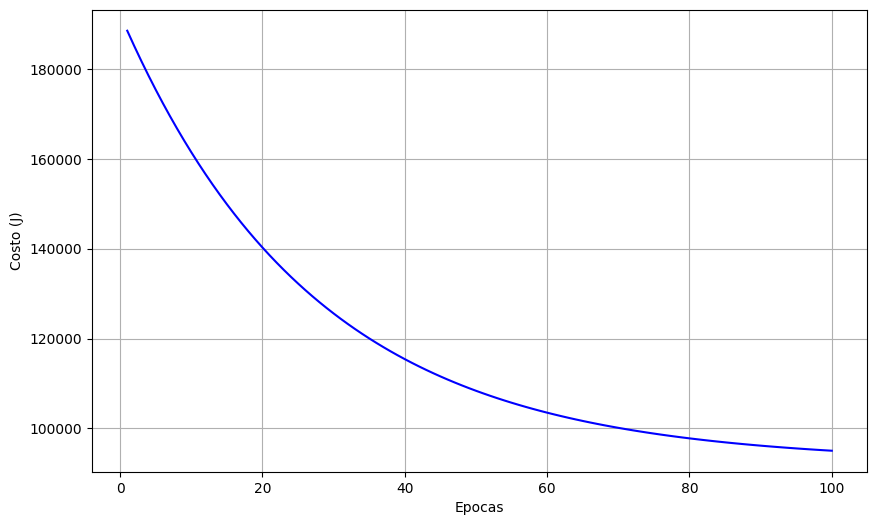

In [319]:
plt.plot(range(1, epocas + 1), historialCostos, color = 'blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Epocas")
plt.ylabel("Costo (J)")
plt.show()

In [320]:
costo = Costo(x,y, teta)
i = 1
while True:
    i = i + 1
    teta, historialCostos = GradienteDescediente(x, y, teta, alfa, epocas)
    nuevoCosto = Costo(x,y,teta)
    print("Iteracion: ", i*100, "Costo: ", nuevoCosto)
    if(costo - nuevoCosto > 0):
        costo = nuevoCosto
    else:
        break
i

Iteracion:  200 Costo:  92466.78785354922
Iteracion:  300 Costo:  92274.81772081128
Iteracion:  400 Costo:  92145.17093935411
Iteracion:  500 Costo:  92019.3716539982
Iteracion:  600 Costo:  91895.8957085656
Iteracion:  700 Costo:  91774.65469082989
Iteracion:  800 Costo:  91655.59770428494
Iteracion:  900 Costo:  91538.6761096804
Iteracion:  1000 Costo:  91423.84259487061
Iteracion:  1100 Costo:  91311.05111075836
Iteracion:  1200 Costo:  91200.25683051923
Iteracion:  1300 Costo:  91091.41611082407
Iteracion:  1400 Costo:  90984.48645446904
Iteracion:  1500 Costo:  90879.4264743456
Iteracion:  1600 Costo:  90776.19585869937
Iteracion:  1700 Costo:  90674.75533762753
Iteracion:  1800 Costo:  90575.06665076783
Iteracion:  1900 Costo:  90477.09251613329
Iteracion:  2000 Costo:  90380.79660004878
Iteracion:  2100 Costo:  90286.14348814749
Iteracion:  2200 Costo:  90193.09865738678
Iteracion:  2300 Costo:  90101.62844904461
Iteracion:  2400 Costo:  90011.70004265943
Iteracion:  2500 Costo:

96471

In [321]:
historialCostos[-1], teta

(68492.55386590681,
 array([637.92231824,  -0.7068039 ,  -9.8408648 ,  -1.07382812,
         16.30487751]))

In [322]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)
lin_reg.score(x,y), lin_reg.intercept_, lin_reg.coef_

(0.04102161087094691,
 637.9242466522262,
 array([ 0.        , -0.70701688, -9.84084229, -1.07379345, 16.30439949]))

In [323]:
y_hat = testX.dot(teta)

In [324]:
comparativaValores = np.transpose(np.array([y_hat, testY, np.subtract(y_hat, testY)]))
comparativa = pd.DataFrame(comparativaValores, columns = ["y_hat", "y", "error"])
comparativa

y_hat       y       error
0   388.928828   225.0  163.928828
1   476.236991   145.0  331.236991
2   533.344393   685.0 -151.655607
3   492.036258   120.0  372.036258
4   424.935710   197.0  227.935710
5   306.835082    78.0  228.835082
6   526.343826   975.0 -448.656174
7   396.273578   850.0 -453.726422
8   502.428368    85.0  417.428368
9   461.375755   110.0  351.375755
10  432.158775   725.0 -292.841225
11  497.813088   180.0  317.813088
12  173.875091   556.0 -382.124909
13  497.851701    87.0  410.851701
14  304.120875   115.0  189.120875
15  508.906424   150.0  358.906424
16  538.559815   650.0 -111.440185
17  539.819035   306.0  233.819035
18  428.839552     9.7  419.139552
19  457.128861   514.0  -56.871139
20  464.051297    85.0  379.051297
21  526.075811     6.7  519.375811
22  476.323889   260.0  216.323889
23  273.632381   130.0  143.632381
24  492.221529   714.0 -221.778471
25  488.278325   250.0  238.278325
26  407.566705   120.0  287.566705
27  537.331668   620.0  -82.668332
28  250.816788   510.0 -259.183212
29  439.930679   145.0  294.930679
30  413.974518   188.0  225.974518
31  491.816521    78.0  413.816521
32  347.501460   680.0 -332.498540
33  402.858467    60.0  342.858467
34  541.741380  1100.0 -558.258620
35  392.384003    12.2  380.184003
36  427.765315   145.0  282.765315
37  368.263692   925.0 -556.736308
38  375.533361   200.0  175.533361
39  473.680099   320.0  153.680099
40  456.334362   150.0  306.334362
41  350.085685   690.0 -339.914315
42  450.242851   130.0  320.242851
43  552.185909   850.0 -297.814091
44  360.832532   390.0  -29.167468
45  406.050177   130.0  276.050177
46  511.633897    32.0  479.633897
47  486.303605    69.0  417.303605
48  525.748011   500.0   25.748011
49  363.943335   140.0  223.943335
50  447.965441   273.0  174.965441
51  496.748944    19.7  477.048944
52  459.634558    19.9  439.734558

In [325]:
comparativa.describe()

y_hat            y       error
count   53.000000    53.000000   53.000000
mean   440.514513   315.192453  125.322060
std     81.487982   296.013967  302.319897
min    173.875091     6.700000 -558.258620
25%    396.273578   110.000000  -82.668332
50%    457.128861   180.000000  227.935710
75%    497.813088   514.000000  351.375755
max    552.185909  1100.000000  519.375811

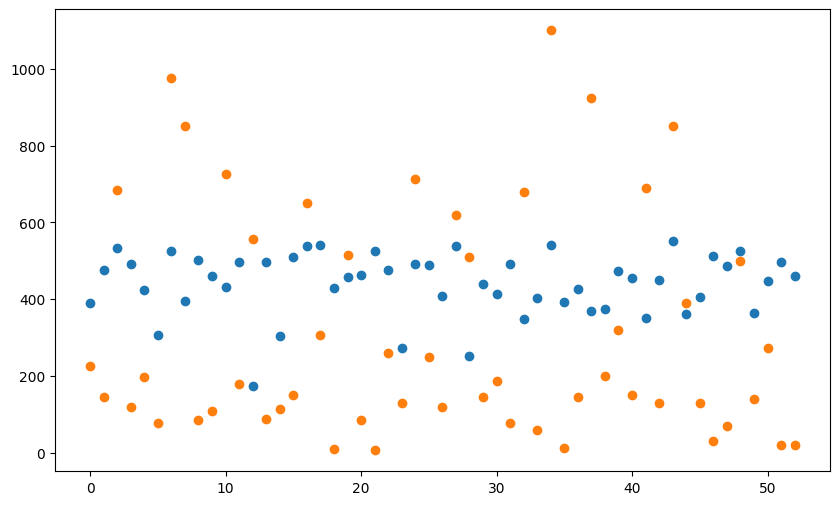

In [326]:
xNo = np.arange(len(y_hat))
plt.scatter(xNo, y_hat)
plt.scatter(xNo, testY)
plt.show()

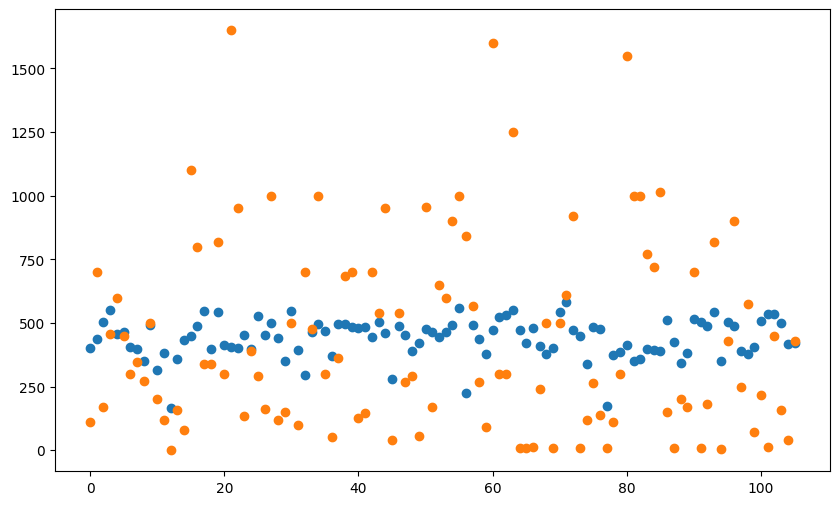

In [327]:
y_hat = x.dot(teta)
xNo = np.arange(len(y_hat))
plt.scatter(xNo, y_hat)
plt.scatter(xNo, y)
plt.show()